# 601 - Mid Project about Earthquake Data

## data source - https://earthquake.usgs.gov/earthquakes/search/
        
      . From the above url we can get earthquake data from various filters, such as magnitude and Date & Time.
      . For this project, I collected data for a year, which consists of 8502 rows and 22 columns.
      . By the end of this project, the user will be able to understand the affected earthquake zones listed on the basemap.

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/suresh1308/Files/main/Earthquakes%20data.csv')
#df.head()

In [2]:
# Creating another dataframe to store desired values for plotting
EQ_Data = pd.DataFrame()
# Extracting date and time from original dataframe and stroing them in new EQ_Data dataframe
date = df['time'].astype(str)
EQ_Data['Date'] = pd.to_datetime(date.str[:10],format ='%Y-%m-%d')
EQ_Data['Time'] = pd.to_datetime(date.str[11:19],format ='%H:%M:%S').dt.time
# storing other important columns to new dataframe
EQ_Data[['ID','latitude','longitude','depth','Magnitude','dmin','rms','horizontalError','depthError','magError','magNst']] = df[['id','latitude', 'longitude','depth','mag','dmin','rms','horizontalError','depthError','magError','magNst']]
#df2.head()

In [3]:
# logic to extract country from 'place' string
list =[]
# Creating for loop to split the place column and storing the last value in new dataframe
for line in df['place'].astype(str):
    parts = line.split(',')
    list.append(parts[-1].strip())
EQ_Data['place'] = list
#EQ_Data.head()

In [4]:
# defined different lists based on number of occurances and categorized them into 'red','orange' and 'green' zones
df_place = EQ_Data.groupby('place').agg({'Magnitude':'count'}).sort_values(by='Magnitude')
# Storing values in red list if numnber of occurances are more than 100
list_red = df_place.tail(20).index.to_list()
# Storing values in yellow list if number of occurances are between 10 to 100
list_yellow = df_place[150:-20].index.to_list()
# Storing values in yellow list if number of occurances are less than 10
list_green = df_place[:150].index.to_list()
# print(list_red)
# print(list_yellow)
# print(list_green)

In [5]:
# Magnitude plot logic
# Storing longitude and latitude values in different lists based on magnitude severity
index_morethan7 = []
index_lessthan7 = []
long_morethan7 = []
lat_morethan7 = []
long_lessthan7 = []
lat_lessthan7 = []
# loop for storing indexes of magnitude more than 7 and less than 7
for i in range(0,len(EQ_Data)):
    if EQ_Data['Magnitude'].iloc[i] > 7:
        index_morethan7.append(i)
    else:
        index_lessthan7.append(i)
# loops for storing longitude and latitude values for magnitude more than 7 and less than 7
for i in index_morethan7:
    long = EQ_Data['longitude'].iloc[i]
    lat = EQ_Data['latitude'].iloc[i]
    long_morethan7.append(long)
    lat_morethan7.append(lat)
for i in index_lessthan7:
    long = EQ_Data['longitude'].iloc[i]
    lat = EQ_Data['latitude'].iloc[i]
    long_lessthan7.append(long)
    lat_lessthan7.append(lat)
#print(len(long_morethan8),len(lat_morethan8),len(long_lessthan8),len(lat_lessthan8))

In [6]:
# Number of Occurances plot logic
index_red=[]
index_yellow=[]
index_green=[]
long_red=[]
long_yellow=[]
long_green=[]
lat_red=[]
lat_yellow=[]
lat_green=[]
# Storing values in different lists(red,yellow and green) based on number of occurances
for i in range (0,len(EQ_Data)):
    if EQ_Data['place'].iloc[i] in list_red:
            index_red.append(i)
    elif EQ_Data['place'].iloc[i] in list_yellow:
        index_yellow.append(i)
    else:
        index_green.append(i)
# Storing longitude and latitude values for red,yellow and green zones
for i in index_red:
    long = EQ_Data['longitude'].iloc[i]
    lat = EQ_Data['latitude'].iloc[i]
    long_red.append(long)
    lat_red.append(lat)
for i in index_yellow:
    long = EQ_Data['longitude'].iloc[i]
    lat = EQ_Data['latitude'].iloc[i]
    long_yellow.append(long)
    lat_yellow.append(lat)
for i in index_green:
    long = EQ_Data['longitude'].iloc[i]
    lat = EQ_Data['latitude'].iloc[i]
    long_green.append(long)
    lat_green.append(lat)
    
#print(len(lat_red),len(long_red),len(lat_yellow),len(long_yellow),len(lat_green),len(long_green))
# lat_red

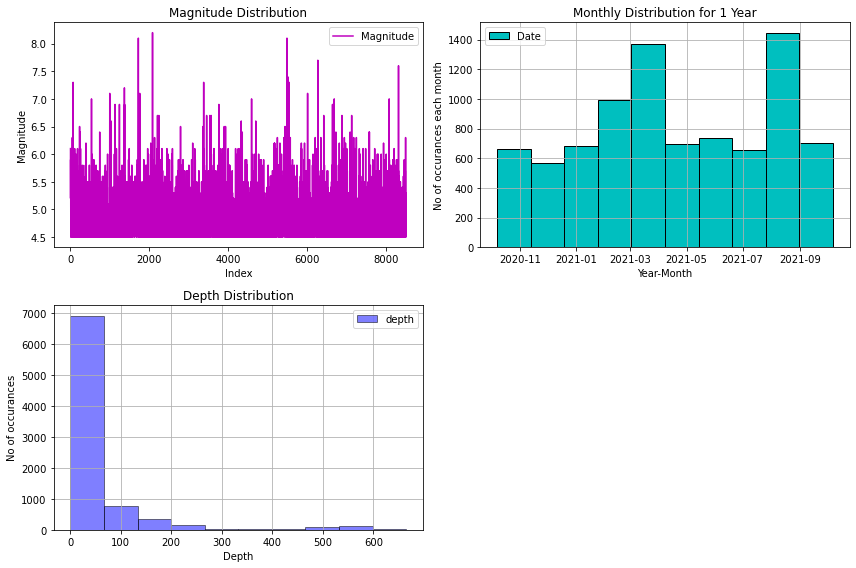

In [7]:
# Plotting data for different distributions
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

text = "Distribution Plots"
display(HTML(f"<div style='text-align:center; font-size:25px; margin-bottom: 10px; margin-top: 20px'>{text}</div>"))
fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
# Magnitude Distribution plot
EQ_Data['Magnitude'].plot(legend=True,color='m')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Magnitude Distribution')
plt.subplot(2,2,2)
# Monthly Distribution plot
EQ_Data['Date'].hist(legend=True,color='c',edgecolor='k')
plt.xlabel('Year-Month')
plt.ylabel('No of occurances each month')
plt.title('Monthly Distribution for 1 Year')
plt.subplot(2,2,3)
# Depth distribution plot
EQ_Data['depth'].hist(legend=True,color='b',edgecolor='k',alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('No of occurances')
plt.title('Depth Distribution')

plt.tight_layout()
plt.show()

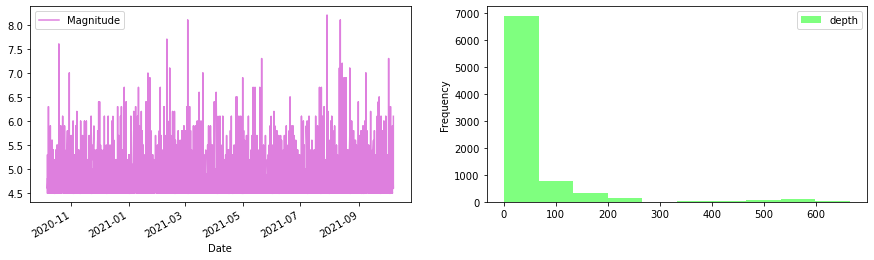

In [8]:
# Plotting comaprision graphs
text = "Magnitude and Depth vs Date Plots"
display(HTML(f"<div style='text-align:center; font-size:25px; margin-bottom: 10px; margin-top: 20px'>{text}</div>"))
figure, axes = plt.subplots(1,2,figsize=(15,4))
# Magnitutde vs Date plot
EQ_Data.plot(y="Magnitude",x="Date",kind='line',color='m',ax=axes[0],alpha=0.5)
# Depth vs Date plot
EQ_Data.plot(y="depth",x="Date",kind='hist',color='lime',ax=axes[1],alpha=0.5)
plt.show()

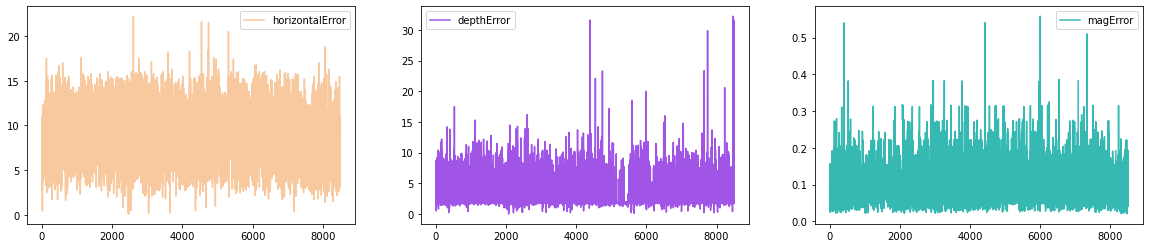

In [9]:
# Plotting Error graphs
text = "Error Plots"
display(HTML(f"<div style='text-align:center; font-size:25px; margin-bottom: 10px; margin-top: 20px'>{text}</div>"))
fig = plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
# HorizontalError plot
EQ_Data['horizontalError'].plot(legend=True,color='sandybrown',alpha=0.6)
plt.subplot(1,3,2)
# DepthError plot
EQ_Data['depthError'].plot(legend=True,color='blueviolet',alpha=0.8)
# MagnitudeError plot
plt.subplot(1,3,3)
EQ_Data['magError'].plot(legend=True,color='lightseagreen',alpha=0.9)
plt.show()

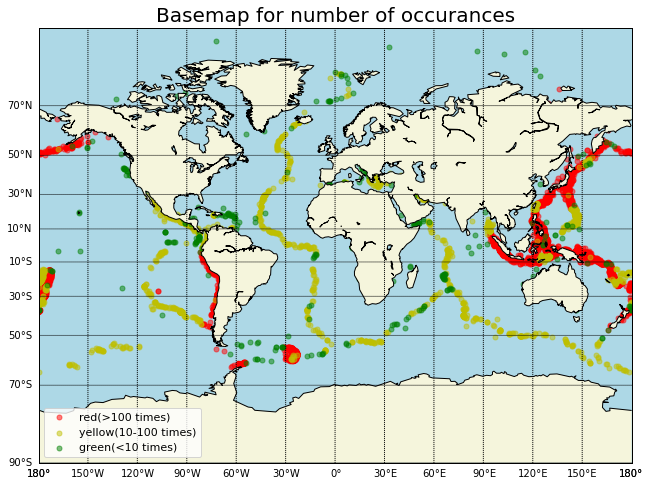

In [10]:
# Plotting basemap for number of occurances
# Basemap library is required
from mpl_toolkits.basemap import Basemap
import numpy as np

fig = plt.figure(figsize=(30,8))
# drawing 'mill' projection
m = Basemap(projection='mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,20),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
# filling continents & sea with suitable colors
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='beige')
# Plotting scatter plot for different zones
m.scatter(long_red,lat_red,latlon=True,s=25,c='r',alpha=0.5,label='red(>100 times)')
m.scatter(long_yellow,lat_yellow,latlon=True,s=25,c='y',alpha=0.5,label='yellow(10-100 times)')
m.scatter(long_green,lat_green,latlon=True,s=25,c='g',alpha=0.5,label='green(<10 times)')

plt.title('Basemap for number of occurances', fontsize=20)
plt.legend(prop={'size': 11})
plt.show()

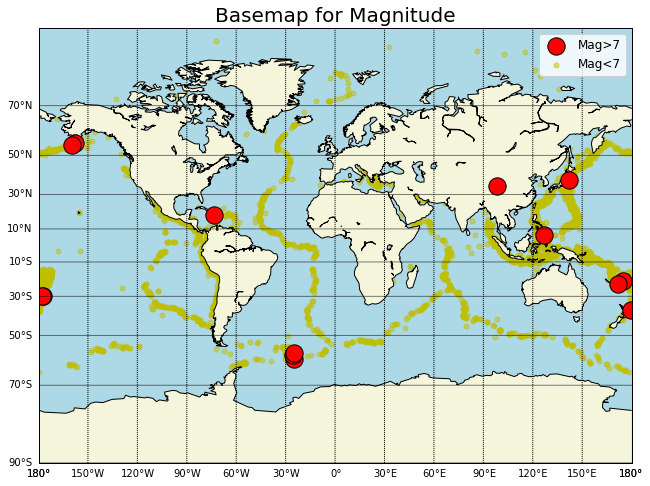

In [11]:
# Plotting basemap for magnitude
# Basemap library is required
fig = plt.figure(figsize=(30,8))

m = Basemap(projection='mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,20),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
# filling continents & sea with suitable colors
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='beige')
#m.etopo()
# Plotting scatter plot for different magnitudes
m.scatter(long_morethan7,lat_morethan7,latlon=True,s=300,c='r',alpha=1,edgecolor='k',label='Mag>7',zorder=2)
m.scatter(long_lessthan7,lat_lessthan7,latlon=True,s=25,c='y',alpha=0.5,label='Mag<7',zorder=1)

plt.title('Basemap for Magnitude', fontsize=20)
plt.legend(prop={'size': 12})
plt.show()

## Insights gained by doing this Project
    
    . For the past year, the majority of earthquakes have occurred in the sea area. 
    . Even on land, earthquakes are most common along coastlines.
    . The frequency of earthquakes is higher in Indonesia, New Zealand, Japan, and the Philippines regions.